<a href="https://colab.research.google.com/github/NoeSin/PrimerEntrega-Milozzi-Sincosky/blob/main/AnalisisUnivariado_Sincosky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

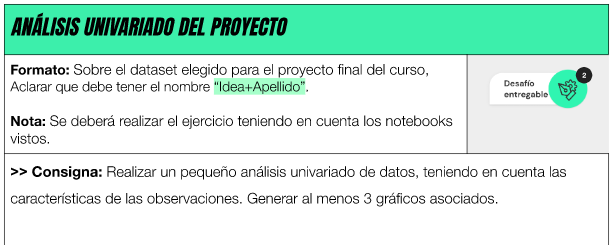

# Analisis de los datos

In [ ]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/DataScience/Entregables/Clase34"

/content/drive/MyDrive/DataScience/Entregables/Clase34


In [ ]:
df_customer_cases = pd.read_csv("customer_cases.csv")
df_customer_info = pd.read_csv("customer_info.csv")
df_customer_product = pd.read_csv("customer_product.csv")
df_product_info = pd.read_csv("product_info.csv")

In [ ]:
print("Datos de clientes:    --------------------------------------------------------------      ")
display(df_customer_info.head())
print('\n',"Cantidad: Datos de clientes:------------      ")
display( df_customer_info.count())
print('\n', "               Shape Clientes: " , df_customer_info.shape)
print('\n','-------------------------------------------------------------------------------------------')

Datos de clientes:    --------------------------------------------------------------      


,Unnamed: 0,customer_id,age,gender
0,1,C2448,76,female
1,2,C2449,61,male
2,3,C2450,58,female
3,4,C2451,62,female
4,5,C2452,71,male



 Cantidad: Datos de clientes:------------      


Unnamed: 0     508932
customer_id    508932
age            508932
gender         508932
dtype: int64


                Shape Clientes:  (508932, 4)

 -------------------------------------------------------------------------------------------


In [ ]:
print( '\n', '\n', "Casos de CallCenter:          ")
display(df_customer_cases.head())
print('\n',"Cantidades: casos CallCenter:------------      ")
display( df_customer_cases.count())
print('\n', "               Shape Casos: " , df_customer_cases.shape)
print('\n','------------------------------------------------------------------------------------------------')




 
 Casos de CallCenter:          


,Unnamed: 0,case_id,date_time,customer_id,channel,reason
0,1,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,2,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,3,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,4,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,5,CC105,2017-01-01 13:52:22,C2452,phone,signup



 Cantidades: casos CallCenter:------------      


Unnamed: 0     330512
case_id        330512
date_time      330512
customer_id    330512
channel        330512
reason         330512
dtype: int64


                Shape Casos:  (330512, 6)

 ------------------------------------------------------------------------------------------------


In [ ]:
print( '\n', '\n', "Suscripciones de clientes a productos:          ")
display(df_customer_product.head())
print('\n',"Cantidades: casos Suscripciones:------------      ")
display( df_customer_product.count())
print('\n', "               Shape Suscripciones: " , df_customer_product.shape)
print('\n','--------------------------------------')



 
 Suscripciones de clientes a productos:          


,Unnamed: 0,customer_id,product,signup_date_time,cancel_date_time
0,1,C2448,prd_1,2017-01-01 10:35:09,NaN
1,2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,4,C2451,prd_2,2017-01-01 13:32:08,NaN
4,5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01



 Cantidades: casos Suscripciones:------------      


Unnamed: 0          508932
customer_id         508932
product             508932
signup_date_time    508932
cancel_date_time    112485
dtype: int64


                Shape Suscripciones:  (508932, 5)

 --------------------------------------


In [ ]:
print( '\n', '\n', "Informacion de productos:          ")
display(df_product_info.head())
print('\n',"Cantidades: casos Suscripciones:------------      ")
display( df_product_info.count())
print('\n', "               Shape Suscripciones: " , df_product_info.shape)
print('\n','--------------------------------------')





 
 Informacion de productos:          


,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1



 Cantidades: casos Suscripciones:------------      


product_id       2
name             2
price            2
billing_cycle    2
dtype: int64


                Shape Suscripciones:  (2, 4)

 --------------------------------------


Los datos estan normalizados, para el analisis creemos conveniente unirlos en un unico dataframe que contenga los valores que pueden ser interesantes.

Vemos que no existen missing values savlo por la fecha de cancelación de suscripciones, pero en este caso la ausencia de valor significa que el usuario continua con el producto.
Las Cantidades:

Clientes son 508.932, para cada uno de ellos existe informacion de la suscripcion al producto la misma cantidad de registros

Llamadas a call center son  330.512 casos, por lo tantos hubo menos llamadas que clientes

Productos: solo 2 tipos de suscripcion mensual y anual.

In [ ]:
#sacando columnas unnamed
df_customer_cases = df_customer_cases.drop(["Unnamed: 0"],axis=1)
df_customer_cases.head()

,case_id,date_time,customer_id,channel,reason
0,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [ ]:
df_customer_cases.describe(include='all')

,case_id,date_time,customer_id,channel,reason
count,330512,330512,330512,330512,330512
unique,330512,329205,258660,2,2
top,CC101,2021-05-18 13:58:31,C20510,phone,support
freq,1,3,5,286840,200985


In [ ]:
df_customer_cases.dtypes

case_id        object
date_time      object
customer_id    object
channel        object
reason         object
dtype: object

In [ ]:
#convirtiendo la fecha a formato fecha
df_customer_cases['date_time']=df_customer_cases['date_time'].astype('datetime64')
df_customer_cases.head()

,case_id,date_time,customer_id,channel,reason
0,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [ ]:
df_customer_cases.dtypes

case_id                object
date_time      datetime64[ns]
customer_id            object
channel                object
reason                 object
dtype: object

In [ ]:
df_customer_info = df_customer_info.drop(["Unnamed: 0"],axis=1)
df_customer_info.head()

,customer_id,age,gender
0,C2448,76,female
1,C2449,61,male
2,C2450,58,female
3,C2451,62,female
4,C2452,71,male


In [ ]:
df_customer_product = df_customer_product.drop(["Unnamed: 0"],axis=1)
df_customer_product.head()

,customer_id,product,signup_date_time,cancel_date_time
0,C2448,prd_1,2017-01-01 10:35:09,NaN
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,C2451,prd_2,2017-01-01 13:32:08,NaN
4,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [ ]:
df_customer_product.describe( include= 'all')

,customer_id,product,signup_date_time,cancel_date_time
count,508932,508932,508932,112485
unique,508932,2,506081,112321
top,C2448,prd_1,2021-03-22 13:47:59,2021-05-15 09:45:06
freq,1,325649,3,2


 Vemos que hay un registro por cliente (freq=1). ademas las fechas no tienen dato date asi que vamos a convertirlas.


In [ ]:
df_customer_product.dtypes

customer_id         object
product             object
signup_date_time    object
cancel_date_time    object
dtype: object

In [ ]:
df_customer_product['fecha_inicio'] = df_customer_product['signup_date_time'].astype('datetime64').dt.date.astype('datetime64')
df_customer_product.dtypes

customer_id                 object
product                     object
signup_date_time            object
cancel_date_time            object
fecha_inicio        datetime64[ns]
dtype: object

In [ ]:
df_customer_product['fecha_fin'] = df_customer_product['cancel_date_time'].astype('datetime64').dt.date.astype('datetime64')
df_customer_product.dtypes

customer_id                 object
product                     object
signup_date_time            object
cancel_date_time            object
fecha_inicio        datetime64[ns]
fecha_fin           datetime64[ns]
dtype: object

In [ ]:
df_customer_product.drop(['signup_date_time','cancel_date_time'], axis=1, inplace=True)

In [ ]:
df_customer_product

,customer_id,product,fecha_inicio,fecha_fin
0,C2448,prd_1,2017-01-01,NaT
1,C2449,prd_1,2017-01-01,2021-09-05
2,C2450,prd_1,2017-01-01,2019-01-13
3,C2451,prd_2,2017-01-01,NaT
4,C2452,prd_1,2017-01-01,2021-06-28
...,...,...,...,...
508927,C511375,prd_2,2021-12-31,NaT
508928,C511376,prd_2,2021-12-31,NaT
508929,C511377,prd_2,2021-12-31,NaT
508930,C511378,prd_2,2021-12-31,NaT


 Para obtener el dato target y saber si el cliente abandonó el producto, agregaremos dos columnas calculadas, una con la duracion del cliente y otra categorica informando si el cliente abandonó el producto.

In [ ]:
from datetime import date
df_customer_product['fin_calculo'] = df_customer_product['fecha_fin'].fillna(date.today()).astype('datetime64').dt.date.astype('datetime64')
df_customer_product['duracion'] = df_customer_product['fin_calculo'] - df_customer_product['fecha_inicio']
df_customer_product.drop(['fin_calculo'],axis=1, inplace=True)
df_customer_product['activo']=  df_customer_product['fecha_fin'].isna()
df_customer_product

,customer_id,product,fecha_inicio,fecha_fin,duracion,activo
0,C2448,prd_1,2017-01-01,NaT,2046 days,True
1,C2449,prd_1,2017-01-01,2021-09-05,1708 days,False
2,C2450,prd_1,2017-01-01,2019-01-13,742 days,False
3,C2451,prd_2,2017-01-01,NaT,2046 days,True
4,C2452,prd_1,2017-01-01,2021-06-28,1639 days,False
...,...,...,...,...,...,...
508927,C511375,prd_2,2021-12-31,NaT,221 days,True
508928,C511376,prd_2,2021-12-31,NaT,221 days,True
508929,C511377,prd_2,2021-12-31,NaT,221 days,True
508930,C511378,prd_2,2021-12-31,NaT,221 days,True


Para poder obtener estadisticas por genero y edad unimos con la información de clientes:

In [ ]:
df = pd.merge(df_customer_info,  df_customer_product,how="left", on='customer_id',indicator="indicador")

In [ ]:
df.head()

,customer_id,age,gender,product,fecha_inicio,fecha_fin,duracion,activo,indicador
0,C2448,76,female,prd_1,2017-01-01,NaT,2046 days,True,both
1,C2449,61,male,prd_1,2017-01-01,2021-09-05,1708 days,False,both
2,C2450,58,female,prd_1,2017-01-01,2019-01-13,742 days,False,both
3,C2451,62,female,prd_2,2017-01-01,NaT,2046 days,True,both
4,C2452,71,male,prd_1,2017-01-01,2021-06-28,1639 days,False,both


In [ ]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,customer_id,age,gender,product,fecha_inicio,fecha_fin,duracion,activo,indicador
count,508932,508932.000000,508932,508932,508932,112485,508932,508932,508932
unique,508932,NaN,2,2,1826,1795,NaN,2,1
top,C2448,NaN,male,prd_1,2021-01-04 00:00:00,2021-12-18 00:00:00,NaN,True,both
freq,1,NaN,309930,325649,1007,210,NaN,396447,508932
first,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,2017-01-08 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2021-12-31 00:00:00,2021-12-31 00:00:00,NaN,NaN,NaN
mean,NaN,58.473030,NaN,NaN,NaN,NaN,755 days 02:43:01.650986784,NaN,NaN
std,NaN,8.257361,NaN,NaN,NaN,NaN,448 days 15:57:11.591924744,NaN,NaN
min,NaN,21.000000,NaN,NaN,NaN,NaN,1 days 00:00:00,NaN,NaN
25%,NaN,53.000000,NaN,NaN,NaN,NaN,414 days 00:00:00,NaN,NaN


Vemos, que el indicador del merge todos los clientes tienen su dato de suscripción y mantenemos la cantidad de registros en 508.932

In [ ]:
df.drop(['indicador'], axis=1,inplace=True)

## Analizamos ahora la tabla de información del producto:

In [ ]:
df_product_info.head()

,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


Son solo dos productos con informacion de precio y de periodo de facturación, será interesante para el calculo de ingresos en funcion a la cantidad de clientes que puedan permanecer activos. lo incluimos en el data frame junto al resto de los datos dejando un df con todos los datos de suscripciones y clientes. 
Esto lo realizamos porque verificamos que todas las relaciones desde customer_product hacia el resto de los data frames es de uno a uno.

In [ ]:
df = pd.merge(df, df_product_info,left_on='product', how="left", right_on='product_id')
df

,customer_id,age,gender,product,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle
0,C2448,76,female,prd_1,2017-01-01,NaT,2046 days,True,prd_1,annual_subscription,1200,12
1,C2449,61,male,prd_1,2017-01-01,2021-09-05,1708 days,False,prd_1,annual_subscription,1200,12
2,C2450,58,female,prd_1,2017-01-01,2019-01-13,742 days,False,prd_1,annual_subscription,1200,12
3,C2451,62,female,prd_2,2017-01-01,NaT,2046 days,True,prd_2,monthly_subscription,125,1
4,C2452,71,male,prd_1,2017-01-01,2021-06-28,1639 days,False,prd_1,annual_subscription,1200,12
...,...,...,...,...,...,...,...,...,...,...,...,...
508927,C511375,53,male,prd_2,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1
508928,C511376,60,male,prd_2,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1
508929,C511377,67,female,prd_2,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1
508930,C511378,49,male,prd_2,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1


In [ ]:
#quitamos la columna repetida
df.drop(['product'], axis=1, inplace= True)
df

,customer_id,age,gender,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle
0,C2448,76,female,2017-01-01,NaT,2046 days,True,prd_1,annual_subscription,1200,12
1,C2449,61,male,2017-01-01,2021-09-05,1708 days,False,prd_1,annual_subscription,1200,12
2,C2450,58,female,2017-01-01,2019-01-13,742 days,False,prd_1,annual_subscription,1200,12
3,C2451,62,female,2017-01-01,NaT,2046 days,True,prd_2,monthly_subscription,125,1
4,C2452,71,male,2017-01-01,2021-06-28,1639 days,False,prd_1,annual_subscription,1200,12
...,...,...,...,...,...,...,...,...,...,...,...
508927,C511375,53,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1
508928,C511376,60,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1
508929,C511377,67,female,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1
508930,C511378,49,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1


## Incorporams informacion del call center

Al dataframe vamos a agregar información de las llamadas al call center, para analizar si estas impactaron en la baja de suscripciones. Estas llamadas son en menor cantidad que las suscripciones y además podrian ser varias llamadas por cliente.

Unimos la informacion de los llamados con informacion de suscripciones, como puede haber suscripcines sin llamados al call center hacemos un merge left.

In [ ]:
dfConCasos = pd.merge(df, df_customer_cases, how="left", on = "customer_id", indicator="indicador")
dfConCasos.tail()



,customer_id,age,gender,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle,case_id,date_time,channel,reason,indicador
580779,C511375,53,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,NaN,NaT,NaN,NaN,left_only
580780,C511376,60,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,NaN,NaT,NaN,NaN,left_only
580781,C511377,67,female,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,NaN,NaT,NaN,NaN,left_only
580782,C511378,49,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,NaN,NaT,NaN,NaN,left_only
580783,C511379,55,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,NaN,NaT,NaN,NaN,left_only


In [ ]:
dfConCasos.describe(include='all').T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
customer_id,580784,508932,C20510,5,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,580784.0,NaN,NaN,NaN,NaT,NaT,58.341015,8.505962,21.0,53.0,59.0,64.0,78.0
gender,580784,2,male,349454,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha_inicio,580784,1826,2021-01-04 00:00:00,1255,2017-01-01 00:00:00,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha_fin,129593,1795,2021-09-18 00:00:00,250,2017-01-08 00:00:00,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duracion,580784,NaN,NaN,NaN,NaT,NaT,754 days 08:09:29.073528192,450 days 18:45:30.481572336,1 days 00:00:00,418 days 00:00:00,665 days 00:00:00,1041 days 00:00:00,2046 days 00:00:00
activo,580784,2,True,451191,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,580784,2,prd_1,354529,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,580784,2,annual_subscription,354529,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,580784.0,NaN,NaN,NaN,NaT,NaT,781.214143,524.22674,125.0,125.0,1200.0,1200.0,1200.0


Vemos que hay clientes que no tienen casos de calcenter (indicador = 'LeftOnly')
ademas hay clientes que han llamado mas de una vez al call por lo tanto estos registros se repetira informacion dle cliente y sus fechas y de alta y baja a suscripciones, por ahora lo dejamos como un data Frame separado, mas adelante veremos si incorporar información de resumen.

In [ ]:
dfConCasos.count()

customer_id      580784
age              580784
gender           580784
fecha_inicio     580784
fecha_fin        129593
duracion         580784
activo           580784
product_id       580784
name             580784
price            580784
billing_cycle    580784
case_id          330512
date_time        330512
channel          330512
reason           330512
indicador        580784
dtype: int64

# Resumen de los datos:

Los datos se relacionan con un 2 productos de suscripciones en linea. Contamos con 330 512 observaciones de casos de call center y 9 variables. También resulta importa mencionar, que no tenemos valores missings en nuestros dataset}}


Estos datos son sobre un producto digital basado en suscripciones para asesoramiento financiero que incluye newsletters, webinar y recomendaciones de inversiones. El producto se ofrece en dos modalidades, suscripción anual o mensual.

El producto además provee soporte durante el día a clientes que se comuniquen con un equipo de soporte para ayudarlos tanto con consultas relacionadas al producto o con dudas relacionadas al registro / cancelación

El set de datos contiene la siguiente información:



1. datos demográficos de los clientes
*   **set**: df_customer_info
*   **Cantidad de registros**: 508.932
*   **Missing values**: no tiene.  

2. fechas de suscripción y cancelación al producto de cada cliente:
*   **set**: df_customer_product
*   **Cantidad de registros**: 508.932 (uno por cada cliente)
*   **Missing values**: solo en el campo cancel_date_time, y esto representa que el cliente sigue suscrito al producto.

3.   Información de precios de cada tipo de suscripción.
*   **set**: df_product_info
*   **Cantidad de registros**: 2
*   **Missing values**: no tiene.

4.   actividad del call centerElemento de la lista
*   **set**: df_customer_cases
*   **Cantidad de registros**: 330.512
*   **Missing values**: no tiene.





.

In [ ]:
df.describe(include= 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,customer_id,age,gender,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle
count,508932,508932.000000,508932,508932,112485,508932,508932,508932,508932,508932.000000,508932.000000
unique,508932,NaN,2,1826,1795,NaN,2,2,2,NaN,NaN
top,C2448,NaN,male,2021-01-04 00:00:00,2021-12-18 00:00:00,NaN,True,prd_1,annual_subscription,NaN,NaN
freq,1,NaN,309930,1007,210,NaN,396447,325649,325649,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,2017-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-12-31 00:00:00,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,58.473030,NaN,NaN,NaN,754 days 08:01:17.923180296,NaN,NaN,NaN,812.857464,8.038541
std,NaN,8.257361,NaN,NaN,NaN,448 days 12:27:43.493425240,NaN,NaN,NaN,516.042059,5.280430
min,NaN,21.000000,NaN,NaN,NaN,1 days 00:00:00,NaN,NaN,NaN,125.000000,1.000000
25%,NaN,53.000000,NaN,NaN,NaN,413 days 00:00:00,NaN,NaN,NaN,125.000000,1.000000


In [ ]:
df.age.describe()

count    508932.000000
mean         58.473030
std           8.257361
min          21.000000
25%          53.000000
50%          59.000000
75%          64.000000
max          78.000000
Name: age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


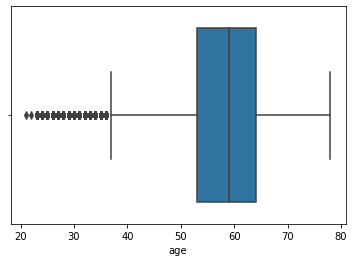

In [ ]:
from seaborn import boxplot
boxplot(df.age, orient='v')

tal como lo muestra el describe y el boxplot, el 50% de las muestras tienen edades entre 53 y 64 años,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


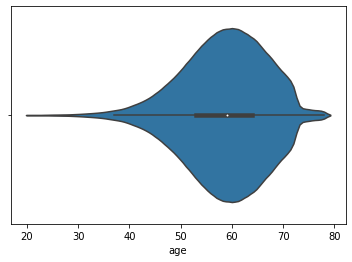

In [ ]:
from seaborn import violinplot
violinplot(df.age, data=df ,  orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


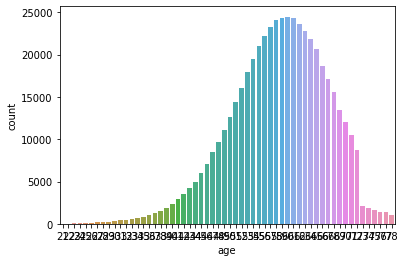

In [ ]:
sns.countplot(df['age'])

## Activo

In [ ]:
df.activo.describe()

count     508932
unique         2
top         True
freq      396447
Name: activo, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


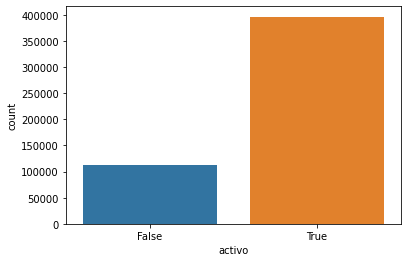

In [ ]:
sns.countplot(df['activo'])

En el diagrama observamos que aproximadamente se encuentran activos 375.000 clientes, y que se dieron de baja 130.000

In [ ]:
df.duracion.describe()

count                         508932
mean     755 days 02:43:01.650986784
std      448 days 15:57:11.591924744
min                  1 days 00:00:00
25%                414 days 00:00:00
50%                676 days 00:00:00
75%               1041 days 00:00:00
max               2046 days 00:00:00
Name: duracion, dtype: object

In [ ]:
#cambiamos el tipo de dato de la duracion a entero en cantidad de dias
df['duracion_int'] = (df['duracion'] ).dt.days.astype('int64')

In [ ]:
df.duracion_int.describe()

count    508932.000000
mean        755.113214
std         448.664717
min           1.000000
25%         414.000000
50%         676.000000
75%        1041.000000
max        2046.000000
Name: duracion_int, dtype: float64

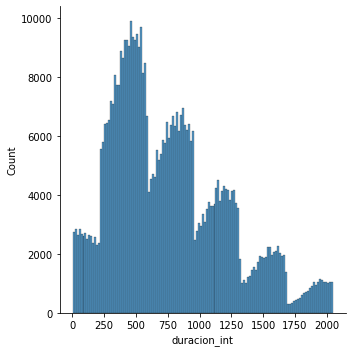

In [ ]:
from seaborn import displot
displot(df.duracion_int)

## Analisis de frecuencias 

No tenemos datos con categorias que valgan la pena hacer analisis de frecuencia, para el ejercicio convertimos las edades de los clientes a categoria segun el rángo de edad y vemos cuales edades cubren el 80% de los clientes.

In [ ]:
bins = np.arange(0,100,5)
bins

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

In [ ]:
age_groups = pd.cut(df["age"], bins)
age_groups

0         (75, 80]
1         (60, 65]
2         (55, 60]
3         (60, 65]
4         (70, 75]
            ...   
508927    (50, 55]
508928    (55, 60]
508929    (65, 70]
508930    (45, 50]
508931    (50, 55]
Name: age, Length: 508932, dtype: category
Categories (19, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (75, 80] <
                                          (80, 85] < (85, 90] < (90, 95]]

In [ ]:
dfg = pd.DataFrame(age_groups)
dfg

,age
0,"(75, 80]"
1,"(60, 65]"
2,"(55, 60]"
3,"(60, 65]"
4,"(70, 75]"
...,...
508927,"(50, 55]"
508928,"(55, 60]"
508929,"(65, 70]"
508930,"(45, 50]"


In [ ]:
dfg.rename(columns={'age':'range_age'},inplace=True)

In [ ]:
#pasamos la edad a categorica
df = pd.concat([df, dfg], axis=1)
df

,customer_id,age,gender,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle,duracion_int,range_age
0,C2448,76,female,2017-01-01,NaT,2046 days,True,prd_1,annual_subscription,1200,12,2046,"(75, 80]"
1,C2449,61,male,2017-01-01,2021-09-05,1708 days,False,prd_1,annual_subscription,1200,12,1708,"(60, 65]"
2,C2450,58,female,2017-01-01,2019-01-13,742 days,False,prd_1,annual_subscription,1200,12,742,"(55, 60]"
3,C2451,62,female,2017-01-01,NaT,2046 days,True,prd_2,monthly_subscription,125,1,2046,"(60, 65]"
4,C2452,71,male,2017-01-01,2021-06-28,1639 days,False,prd_1,annual_subscription,1200,12,1639,"(70, 75]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508927,C511375,53,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,221,"(50, 55]"
508928,C511376,60,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,221,"(55, 60]"
508929,C511377,67,female,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,221,"(65, 70]"
508930,C511378,49,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,221,"(45, 50]"


In [ ]:
df.range_age.astype(str)
df.range_age = df.range_age.astype(str)
df

,customer_id,age,gender,fecha_inicio,fecha_fin,duracion,activo,product_id,name,price,billing_cycle,duracion_int,range_age
0,C2448,76,female,2017-01-01,NaT,2046 days,True,prd_1,annual_subscription,1200,12,2046,"(75, 80]"
1,C2449,61,male,2017-01-01,2021-09-05,1708 days,False,prd_1,annual_subscription,1200,12,1708,"(60, 65]"
2,C2450,58,female,2017-01-01,2019-01-13,742 days,False,prd_1,annual_subscription,1200,12,742,"(55, 60]"
3,C2451,62,female,2017-01-01,NaT,2046 days,True,prd_2,monthly_subscription,125,1,2046,"(60, 65]"
4,C2452,71,male,2017-01-01,2021-06-28,1639 days,False,prd_1,annual_subscription,1200,12,1639,"(70, 75]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508927,C511375,53,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,221,"(50, 55]"
508928,C511376,60,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,221,"(55, 60]"
508929,C511377,67,female,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,221,"(65, 70]"
508930,C511378,49,male,2021-12-31,NaT,221 days,True,prd_2,monthly_subscription,125,1,221,"(45, 50]"


In [ ]:
frec = df["range_age"].value_counts()
frec

(55, 60]    118457
(60, 65]    113230
(50, 55]     88786
(65, 70]     76843
(45, 50]     48850
(70, 75]     24833
(40, 45]     21607
(35, 40]      8181
(75, 80]      3816
(30, 35]      3022
(25, 30]      1028
(20, 25]       279
Name: range_age, dtype: int64

In [ ]:
#Guardamos esta información en un dataframe
frec_df = pd.DataFrame(frec)
frec_df

,range_age
"(55, 60]",118457
"(60, 65]",113230
"(50, 55]",88786
"(65, 70]",76843
"(45, 50]",48850
"(70, 75]",24833
"(40, 45]",21607
"(35, 40]",8181
"(75, 80]",3816
"(30, 35]",3022


In [ ]:
#Asignamos el nombre Frec_abs a la columna
frec_df.rename(columns={'range_age':'Frec_abs'},inplace=True)
frec_df

,Frec_abs
"(55, 60]",118457
"(60, 65]",113230
"(50, 55]",88786
"(65, 70]",76843
"(45, 50]",48850
"(70, 75]",24833
"(40, 45]",21607
"(35, 40]",8181
"(75, 80]",3816
"(30, 35]",3022


In [ ]:
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum
"(55, 60]",118457,118457
"(60, 65]",113230,231687
"(50, 55]",88786,320473
"(65, 70]",76843,397316
"(45, 50]",48850,446166
"(70, 75]",24833,470999
"(40, 45]",21607,492606
"(35, 40]",8181,500787
"(75, 80]",3816,504603
"(30, 35]",3022,507625


In [ ]:
#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(df.range_age),4)
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%
"(55, 60]",118457,118457,23.2756
"(60, 65]",113230,231687,22.2486
"(50, 55]",88786,320473,17.4456
"(65, 70]",76843,397316,15.0989
"(45, 50]",48850,446166,9.5985
"(70, 75]",24833,470999,4.8794
"(40, 45]",21607,492606,4.2456
"(35, 40]",8181,500787,1.6075
"(75, 80]",3816,504603,0.7498
"(30, 35]",3022,507625,0.5938


In [ ]:
#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
"(55, 60]",118457,118457,23.2756,23.2756
"(60, 65]",113230,231687,22.2486,45.5242
"(50, 55]",88786,320473,17.4456,62.9698
"(65, 70]",76843,397316,15.0989,78.0687
"(45, 50]",48850,446166,9.5985,87.6672
"(70, 75]",24833,470999,4.8794,92.5466
"(40, 45]",21607,492606,4.2456,96.7922
"(35, 40]",8181,500787,1.6075,98.3997
"(75, 80]",3816,504603,0.7498,99.1495
"(30, 35]",3022,507625,0.5938,99.7433


In [ ]:
from matplotlib.ticker import PercentFormatter

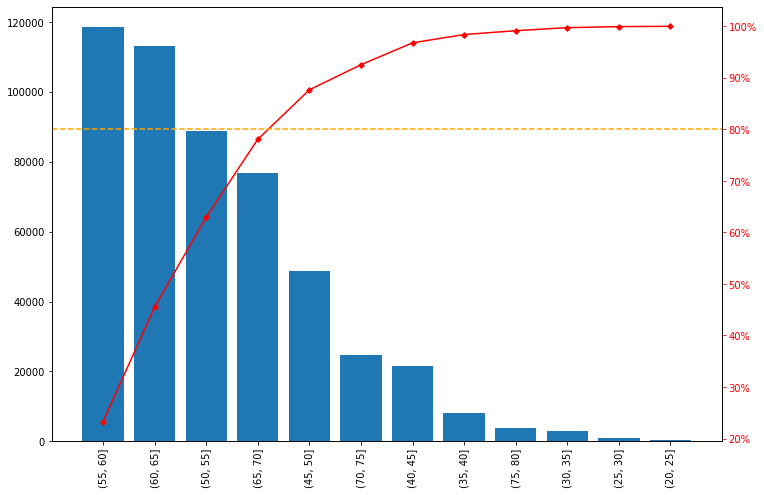

In [ ]:
pareto=pd.DataFrame()
pareto.index=frec_df.index
pareto["frec_abs"]=frec_df["Frec_abs"]
pareto["frec_rel_%_acum"]=frec_df["frec_rel_%_acum"]

color1= "stellblue"
color2= "red"
line_size=4
plt.rcParams["figure.figsize"]= [12, 8]
fig, ax=plt.subplots()
ax.bar(pareto.index, pareto["frec_abs"])
plt.xticks(rotation=90)

ax2= ax.twinx()
ax2.plot(pareto.index, pareto["frec_rel_%_acum"], color=color2 , marker="D",ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color="orange", linestyle="dashed")
ax.tick_params(axis="y")
ax2.tick_params(axis="y",colors=color2)
plt.show()


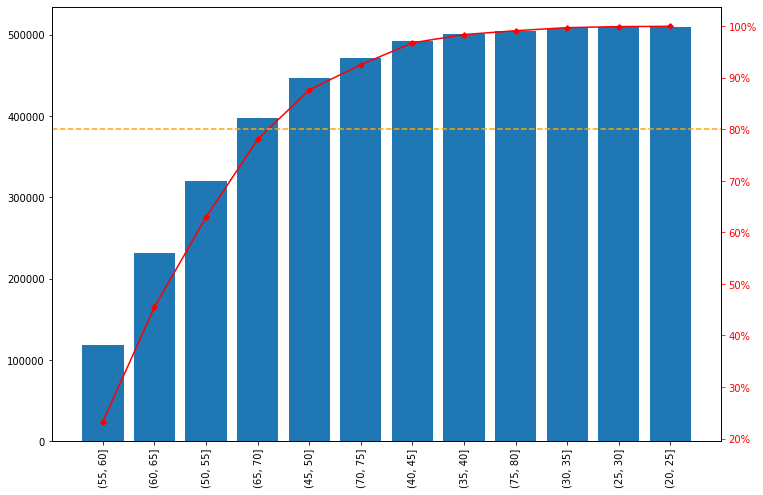

In [ ]:
pareto=pd.DataFrame()
pareto.index=frec_df.index
#pareto["frec_abs"]=frec_df["Frec_abs"]
pareto["frec_rel_%_acum"]=frec_df["frec_rel_%_acum"]
pareto["frec_abs_acum"]=frec_df["frec_abs_acum"]
color1= "stellblue"
color2= "red"

line_size=4
plt.rcParams["figure.figsize"]= [12, 8]
fig, ax=plt.subplots()

ax.bar(pareto.index, pareto["frec_abs_acum"])
plt.xticks(rotation=90)

ax2= ax.twinx()
ax2.plot(pareto.index, pareto["frec_rel_%_acum"], color=color2 , marker="D",ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color="orange", linestyle="dashed")
ax.tick_params(axis="y")
ax2.tick_params(axis="y",colors=color2)
plt.show()


Los rangos de edades que cubren el 80 % de los clientes son 
(55 a 60]
(60 a 65]
y
(50 a 55]

In [ ]:
#guardamos los dataframes para el proximo entregable
df.to_csv('clientes_productos.csv')

In [ ]:
dfConCasos.to_csv('clientes_productos_casos.csv')